<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligecia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 50px; font-style: normal; text-align:center;">

Análisis de datos 

Trabajo práctico integrador

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 30px; font-style: normal;">

<u>Autores</u>:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 30px; font-style: normal">

# LEGO Database

 - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
 - ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

 </span>
 

 ![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

<span style="font-family: Open Sans; font-weight: 100; font-size: 20px; font-style: normal;">

Para responder las preguntas planteadas vamos a utilizar los siguientes datasets que nos van a dar la información de lo que contiene cada set de Lego:

- themes
- sets
- inventories
- inventory_parts
- colors
- parts
- part_categories

</span>

### Importamos las librerías necesarias para el trabajo.

In [1]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import plotly.express as px

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Categorical transformations
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder


# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Training schemas
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

from functools import reduce

from sklearn.feature_extraction import FeatureHasher

In [2]:
#Cargamos las urls donde se encuentran los datasets. Links obtenidos de https://rebrickable.com/downloads/

url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'


# url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
# url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'
# url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
# url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
# url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'

In [102]:
#Creamos los DataFrames

themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)

# inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
# inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)
# minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
# part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
# elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)

In [4]:
# Opcional: correr esto si arriba da SSLCertVerificationError

import urllib.request
import gzip
import ssl

# Create an SSL context with certificate verification disabled
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the URLs of the datasets
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

try:
    # Read the compressed CSV data with SSL context
    themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
    colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
    part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
    parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
    part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
    elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
    sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
    minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
    inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
    inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
    inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
    inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

    # Decompress the data and read into DataFrames
    themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
    colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
    part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
    parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
    part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
    elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
    sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
    minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
    inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
    inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
    inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
    inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

except urllib.error.URLError as e:
    print("An error occurred while accessing the URL:", e)

## Análisis básico de los datasets

En esta sección, exploramos la informacion que contiene cada DataFrame que vamos a utilizar.

Themes: Este dataset incluye información sobre temas de Lego. Cada tema recibe un número de identificación único ("id"), un nombre ("name") y (si es parte de un tema más grande) de qué tema es parte ("parent_id").

In [5]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [6]:
#Verificamos valores nulos
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

In [7]:
#Verificamos tipos de variables
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [8]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in themes.columns:
    print(i,':',   len(themes[i].unique()))

id : 465
name : 382
parent_id : 56


Sets: Este archivo contiene información sobre los sets de LEGO, incluido un número de identificación único para cada set ("set_num"), el nombre del set ("name"), el año en que se lanzó ("year"), su tema ("theme_id"), cuántas partes incluye ("num_parts") y URL que contienen fotos de cada set ("img_url").

In [9]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [10]:
#Verificamos valores nulos
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

In [11]:
#Verificamos tipos de variables
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [12]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in sets.columns:
    print(i,':',   len(sets[i].unique()))

set_num : 21295
name : 18216
year : 73
theme_id : 458
num_parts : 1429
img_url : 21295


Inventories: Esta tabla contiene información sobre inventarios, incluida una identificación única ("id"), su versión ("version") y el número del set ("set_num").

In [13]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [14]:
#Verificamos valores nulos
inventories.isnull().sum()

id         0
version    0
set_num    0
dtype: int64

In [15]:
#Verificamos tipos de variables
inventories.dtypes

id          int64
version     int64
set_num    object
dtype: object

In [16]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventories.columns:
    print(i,':',   len(inventories[i].unique()))

id : 36296
version : 16
set_num : 34679


Inventory_parts: Este dataset contiene información sobre los inventarios de piezas, incluido un número de identificación único ("inventory_id"), el número de pieza ("part_num"), el color de la pieza ("color_id"), cuántas de ellas se incluyen ("quantity") y si se trata de un repuesto ("is_spare").

In [17]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [18]:
#Verificamos valores nulos
inventory_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8236
dtype: int64

In [19]:
#Verificamos tipos de variables
inventory_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
img_url         object
dtype: object

In [20]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventory_parts.columns:
    print(i,':',   len(inventory_parts[i].unique()))

inventory_id : 31768
part_num : 50054
color_id : 212
quantity : 379
is_spare : 2
img_url : 72708


Parts: Este dataset incluye información sobre piezas de lego, incluido un número de identificación único para cada pieza ("part_num"), el nombre de la pieza ("name"), la categoría de la que proviene ("part_cat_id") y su material ("part_material").

In [21]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [22]:
#Verificamos valores nulos
parts.isnull().sum()

part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64

In [23]:
#Verificamos tipos de variables
parts.dtypes

part_num         object
name             object
part_cat_id       int64
part_material    object
dtype: object

In [24]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in parts.columns:
    print(i,':',   len(parts[i].unique()))

part_num : 51608
name : 51103
part_cat_id : 66
part_material : 6


Colors: Esta data contiene información sobre los colores de LEGO, incluida una identificación única para cada color ("id"), su nombre ("name") y el valor RGB aproximado ("rgb"), y si es transparente ("is_trans").

In [25]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [26]:
#Verificamos valores nulos
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

In [27]:
#Verificamos tipos de variables
colors.dtypes

id           int64
name        object
rgb         object
is_trans    object
dtype: object

In [28]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in colors.columns:
    print(i,':',   len(colors[i].unique()))

id : 223
name : 223
rgb : 194
is_trans : 2


Part_categories: Este dataset incluye información sobre la categoría de la pieza ("name") y una identificación única para esa categoría de pieza ("id").

In [29]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [30]:
#Verificamos los valores nulos
part_categories.isnull().sum()

id      0
name    0
dtype: int64

In [31]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in part_categories.columns:
    print(i,':',   len(part_categories[i].unique()))

id : 66
name : 66


## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

Para responder la primera pregunta utilizamos la informacion del DataFrame 'sets'.

In [32]:
year = sets['year'].sort_values().unique()

#Calculamos la media de cantidad de piezas de cada set por año y armamos un dataframe
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,284.0


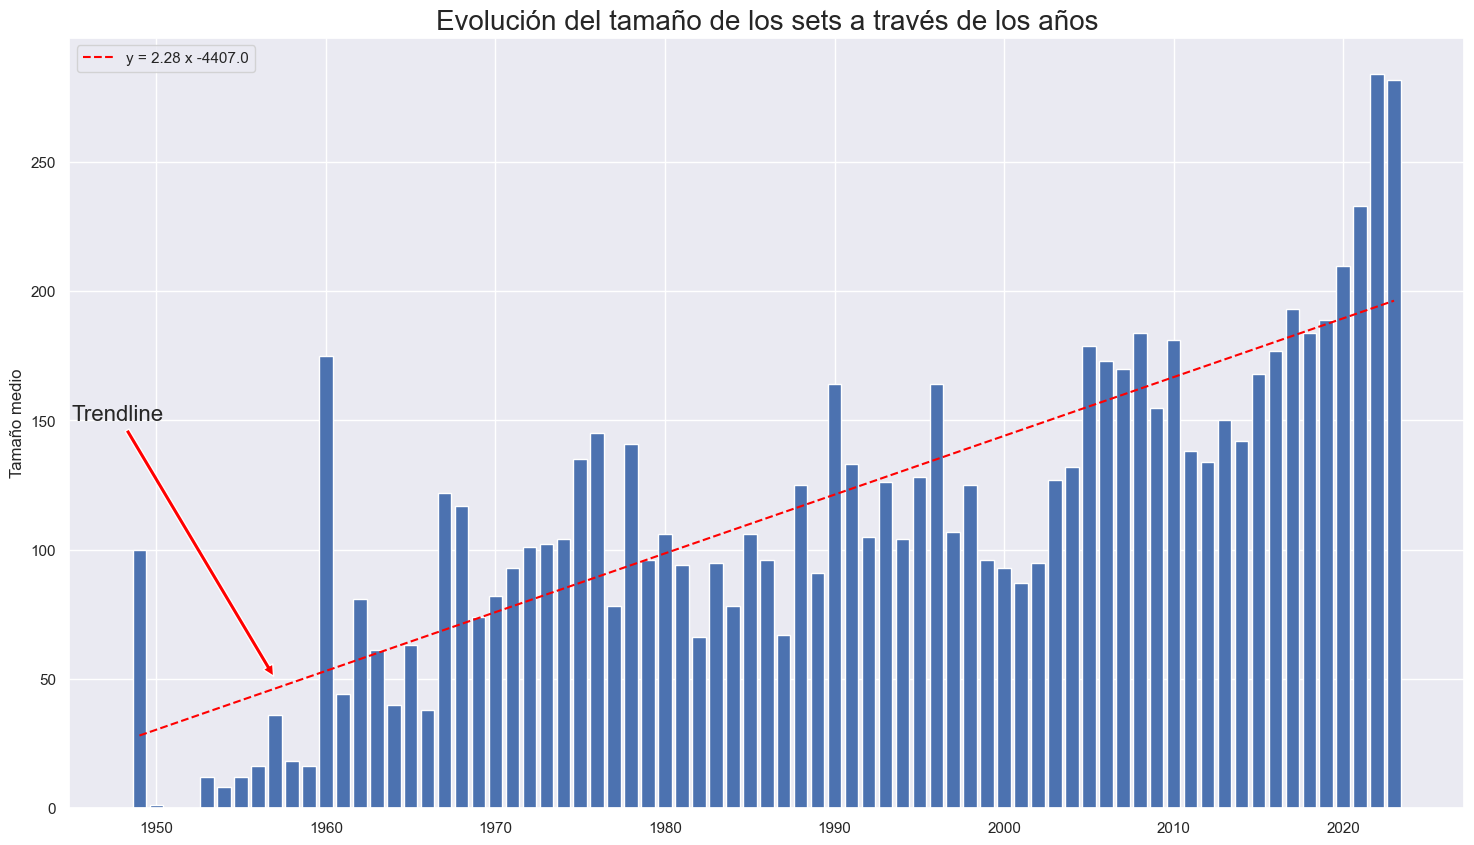

In [33]:
#Graficamos la evolución de la cantidad de piezas media por año.

z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Tamaño medio')
ax.plot(year, p(year), c='red', linestyle='dashed', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Evolución del tamaño de los sets a través de los años',fontsize=20)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=16, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

Se puede observar en el grafico como la media de la cantidad de piezas de cada set fue evolucionando a través de los años. La línea de tendencia es creciente con la fórmula mostrada.

## ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

Para responder esta pregunta vamos a unir los DataFrames para poder obtener información sobre qué piezas contiene cada set y las características de las mismas.

Antes de eso, vamos a realizar una exploracion de los datasets con un ejemplo para poder entender cómo obtener la información.

In [34]:
#Buscamos un ejemplo de set en 'sets', elegimos un set icónico como es la torre Eiffel.
sets[sets['set_num'] == '10307-1']

,set_num,name,year,theme_id,num_parts,img_url
399,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...


<img src="https://cdn.rebrickable.com/media/sets/10307-1.jpg"  width="300" height="600">

In [35]:
#Buscamos el mismo set en 'inventories'
inventories[inventories['set_num'] == '10307-1']

,id,version,set_num
34049,150356,1,10307-1


In [36]:
#Tomamos el id de 'inventories' y observamos que piezas contiene.
inventory_parts[inventory_parts['inventory_id'] == 150356]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
1087754,150356,11090,72,32,f,https://cdn.rebrickable.com/media/parts/elemen...
1087755,150356,11153,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087756,150356,11203,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087757,150356,11211,71,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1087758,150356,11212,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
...,...,...,...,...,...,...
1088059,150356,98138,19,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1088060,150356,99563,72,72,f,https://cdn.rebrickable.com/media/parts/elemen...
1088061,150356,99780,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
1088062,150356,99781,72,40,f,https://cdn.rebrickable.com/media/parts/elemen...


In [37]:
#Verificamos que la suma de las partes da el total de piezas que figuraba en 'sets'.
inventory_parts[(inventory_parts['inventory_id'] == 150356) & (inventory_parts['is_spare'] == 'f')]['quantity'].sum()

10001

Para poder relacionar las temáticas con lo que contiene cada set es necesario unir primero el dataset 'themes' con 'set'.

Primero vamos a asociar las temáticas "hijas" con los nombres de las temáticas "padres" para reducir la variabilidad en el conjunto de temas.

In [38]:
#Los valores NaN son las tematicas 'padres'.
D = {}
for i , j in zip(themes[themes['parent_id'].isnull()]['id'], themes[themes['parent_id'].isnull()]['name']):
    D[i] = j
names = themes['name'].copy()
themes['themes_parent_name'] = names
themes

for i, j in D.items(): 
    themes.loc[themes['parent_id'] == i, 'themes_parent_name'] = j

themes

,id,name,parent_id,themes_parent_name
0,1,Technic,NaN,Technic
1,3,Competition,1.0,Technic
2,4,Expert Builder,1.0,Technic
3,16,RoboRiders,1.0,Technic
4,17,Speed Slammers,1.0,Technic
...,...,...,...,...
460,745,Disney 100,535.0,Collectible Minifigures
461,746,Database Sets,301.0,Other
462,747,Sonic The Hedgehog,NaN,Sonic The Hedgehog
463,748,Gabby’s Dollshouse,NaN,Gabby’s Dollshouse


In [39]:
#Eliminamos la columna 'name' y cambiamos los valores NaN por 0.
themes = themes.drop(columns='name')
themes['parent_id'] = themes['parent_id'].fillna(0)
themes['parent_id'] = themes['parent_id'].astype('int64')
themes

,id,parent_id,themes_parent_name
0,1,0,Technic
1,3,1,Technic
2,4,1,Technic
3,16,1,Technic
4,17,1,Technic
...,...,...,...
460,745,535,Collectible Minifigures
461,746,301,Other
462,747,0,Sonic The Hedgehog
463,748,0,Gabby’s Dollshouse


A continuación, unimos los datasets mencionados anteriormente.

In [40]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'theme_id' y 'theme_name' en el data set 'themes'.
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)

#Unimos los datasets 'sets' con 'themes' por la columna "theme_id" en el nuevo dataset 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,parent_id,themes_parent_name
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,0,Technic
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,0,Technic
...,...,...,...,...,...,...,...,...
21290,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,0,Modulex
21291,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21292,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21293,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,0,Modulex


In [41]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('themes', themes.shape)
print('sets', sets.shape)
print('sets_themes', sets_themes.shape)

themes (465, 3)
sets (21295, 6)
sets_themes (21295, 8)


Del nuevo conjunto de datos, nos interesa conservar sólo las columnas 'set_num' y 'themes_parent_name'.

La variable 'themes_parent_name' va a ser nuestro target en el dataset final, ya que queremos predecir a qué tema pertenece un set de Lego.

In [88]:
#Armamos un dataset que tenga solo el número de set y la temática padre a la que pertenece.
set_num_themes_parent_name = sets_themes[['set_num', 'themes_parent_name']].copy()
set_num_themes_parent_name

,set_num,themes_parent_name
0,001-1,Technic
1,002-1,Technic
2,1030-1,Technic
3,1038-1,Technic
4,1039-1,Technic
...,...,...
21290,M20-2566-10,Modulex
21291,M20-2575-10,Modulex
21292,M20-2576-10,Modulex
21293,M20-2586-10,Modulex


In [90]:
#Al dataset 'inventories' le agregamos el nombre de la temática padre a la cual pertenece esa versión de set. Lo hacemos de esta manera y no con merge para evitar perder información.
for i, j in zip(set_num_themes_parent_name['set_num'], set_num_themes_parent_name['themes_parent_name']): 
    inventories.loc[inventories['set_num'] == i, 'themes_parent_name'] = j
    

inventories

,id,version,set_num,themes_parent_name,year
0,1,1,7922-1,Sports,2004.0
1,3,1,3931-1,Friends,2012.0
2,4,1,6942-1,Space,1999.0
3,15,1,5158-1,Service Packs,1990.0
4,16,1,903-1,System,1969.0
...,...,...,...,...,...
36291,178947,1,fig-014018,NaN,NaN
36292,179238,1,892307-1,Ninjago,2023.0
36293,179297,1,8748-1-DBASE-1,Other,2023.0
36294,179382,1,8711-1,Bionicle,2004.0


Ahora tenemos un dataset que por cada valor único de: 'id + version + set_num', se indica a que temática padre pertenece.

In [96]:
#Cambiamos los nombres de las columnas 'inventory_id' y 'quantity' por 'id' y 'quantity_part' en el data set 'inventory_parts'.
inventory_parts.rename(columns = {'inventory_id':'id', 'quantity':'quantity_part'}, inplace = True)

#Unimos los datasets de 'inventories' y 'inventory_parts'
inventories_inventory_parts = pd.merge(inventories, inventory_parts, on="id")
inventories_inventory_parts

,id,version,set_num,themes_parent_name,year,part_num,color_id,quantity_part,is_spare,img_url
0,1,1,7922-1,Sports,2004.0,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,1,7922-1,Sports,2004.0,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,1,7922-1,Sports,2004.0,stickerupn0077,9999,1,f,NaN
3,1,1,7922-1,Sports,2004.0,upn0342,0,1,f,NaN
4,1,1,7922-1,Sports,2004.0,upn0350,25,1,f,NaN
...,...,...,...,...,...,...,...,...,...,...
1145540,179400,2,7256-1,Star Wars,2005.0,6141,72,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1145541,179400,2,7256-1,Star Wars,2005.0,6141,72,6,f,https://cdn.rebrickable.com/media/parts/elemen...
1145542,179400,2,7256-1,Star Wars,2005.0,6141,41,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1145543,179400,2,7256-1,Star Wars,2005.0,6587,72,4,f,https://cdn.rebrickable.com/media/parts/elemen...


In [97]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('inventories', inventories.shape)
print('inventory_parts', inventory_parts.shape)
print('inventories_inventory_parts', inventories_inventory_parts.shape)

inventories (36296, 5)
inventory_parts (1145545, 6)
inventories_inventory_parts (1145545, 10)


In [98]:
#Eliminamos la columna 'img_url'.
inventories_inventory_parts = inventories_inventory_parts.drop(columns=['img_url','year'])

In [99]:
#Los valores nulos son los sets que pertenecen a la minifigs
inventories_inventory_parts[inventories_inventory_parts['themes_parent_name'].isnull()]

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
762382,48649,1,fig-000001,NaN,20877,484,1,f
762383,48649,1,fig-000001,NaN,3626cpr1963,14,1,f
762384,48649,1,fig-000001,NaN,970c19,70,1,f
762385,48649,1,fig-000001,NaN,973c01h01pr3080,14,1,f
762386,48650,1,fig-000002,NaN,3626cpr1738,14,1,f
...,...,...,...,...,...,...,...,...
1145337,178946,1,fig-014017,NaN,973c22h70pr6312,4,1,f
1145338,178947,1,fig-014018,NaN,3626cpr2375,70,1,f
1145339,178947,1,fig-014018,NaN,79688,0,1,f
1145340,178947,1,fig-014018,NaN,970c05,272,1,f


In [100]:
#Como no vamos a trabajar con las minifigs eliminamos estas filas
inventories_inventory_parts= inventories_inventory_parts.dropna()
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
0,1,1,7922-1,Sports,48379c01,72,1,f
1,1,1,7922-1,Sports,48395,7,1,f
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f
3,1,1,7922-1,Sports,upn0342,0,1,f
4,1,1,7922-1,Sports,upn0350,25,1,f
...,...,...,...,...,...,...,...,...
1145540,179400,2,7256-1,Star Wars,6141,72,1,t
1145541,179400,2,7256-1,Star Wars,6141,72,6,f
1145542,179400,2,7256-1,Star Wars,6141,41,1,t
1145543,179400,2,7256-1,Star Wars,6587,72,4,f


In [103]:
#le agrego el rgb de los colores de cada parte
for i, j in zip(colors['id'], colors['rgb']): 
    inventories_inventory_parts.loc[inventories_inventory_parts['color_id'] == i, 'rgb'] = j

inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68
1,1,1,7922-1,Sports,48395,7,1,f,9BA19D
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,05131D
3,1,1,7922-1,Sports,upn0342,0,1,f,05131D
4,1,1,7922-1,Sports,upn0350,25,1,f,FE8A18
...,...,...,...,...,...,...,...,...,...
1145540,179400,2,7256-1,Star Wars,6141,72,1,t,6C6E68
1145541,179400,2,7256-1,Star Wars,6141,72,6,f,6C6E68
1145542,179400,2,7256-1,Star Wars,6141,41,1,t,AEEFEC
1145543,179400,2,7256-1,Star Wars,6587,72,4,f,6C6E68


In [104]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'part_cat_id' y 'cat_name' en el data set 'inventory_parts'.
part_categories.rename(columns = {'id':'part_cat_id', 'name':'cat_name'}, inplace = True)

#Unimos los datasets de 'parts' y 'part_categories'.
parts_cat = pd.merge(parts, part_categories, on="part_cat_id")
parts_cat

,part_num,name,part_cat_id,part_material,cat_name
0,003381,Sticker Sheet for Set 663-1,58,Plastic,Stickers
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,Stickers
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,Stickers
3,003429,Sticker Sheet for Set 1550-1,58,Plastic,Stickers
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic,Stickers
...,...,...,...,...,...
51603,clikupn0141,"Clikits Connector, Ring 10 x 10 x 1 for Pencil...",48,Plastic,Clikits
51604,clikupn0142,Clikits Rectangle 30 x 12 with 2 Slots & Tabs ...,48,Plastic,Clikits
51605,clikupn0143,Clikits Circle 10 x 10 (Pencil Holder Base),48,Plastic,Clikits
51606,clikupn0144,Clikits Container Cube Drawer,48,Plastic,Clikits


In [105]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('parts', parts.shape)
print('part_categories', part_categories.shape)
print('parts_cat', parts_cat.shape)

parts (51608, 4)
part_categories (66, 2)
parts_cat (51608, 5)


In [135]:
#Unimos los datasets de 'inventories_inventory_parts' y 'parts_cat' por 'part_num' para armar el dataframe final.
df_final_completo = pd.merge(inventories_inventory_parts, parts_cat, on="part_num")
df_final_completo

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb,name,part_cat_id,part_material,cat_name
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
1,738,1,7920-1,Sports,48379c01,0,1,f,05131D,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
2,1733,1,7919-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
3,2304,1,7923-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
4,3157,1,7918-1,Sports,48379c01,272,1,f,0A3463,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083140,179297,1,8748-1-DBASE-1,Other,50899pat0001,73,1,f,5A93DB,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures
1083141,179297,1,8748-1-DBASE-1,Other,50899pat0001,25,1,f,FE8A18,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures
1083142,179297,1,8748-1-DBASE-1,Other,50899pat0001,4,1,f,C91A09,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures
1083143,179297,1,8748-1-DBASE-1,Other,50899pat0001,15,1,f,FFFFFF,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures


Verificamos las temáticas que más se repiten en los sets de Lego para así trabajar sólo con ellas. De esta manera se busca reducir el tamaño del dataset y la cantidad de clases.

In [136]:
subset_df = df_final_completo[['set_num', 'themes_parent_name']]
grouped_df = subset_df.groupby('set_num').first().reset_index()

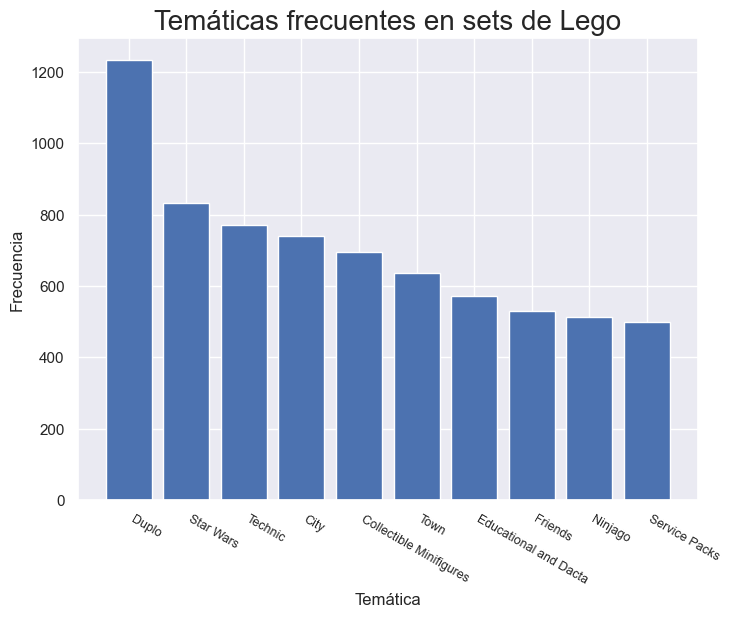

In [137]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

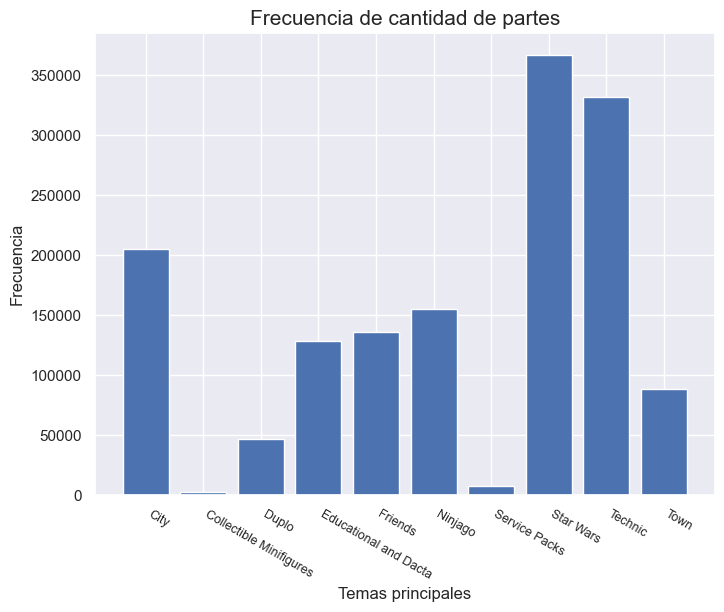

In [138]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [139]:
grouped_df = grouped_df[~grouped_df['themes_parent_name'].isin(['Collectible Minifigures','Service Packs'])]

In [140]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

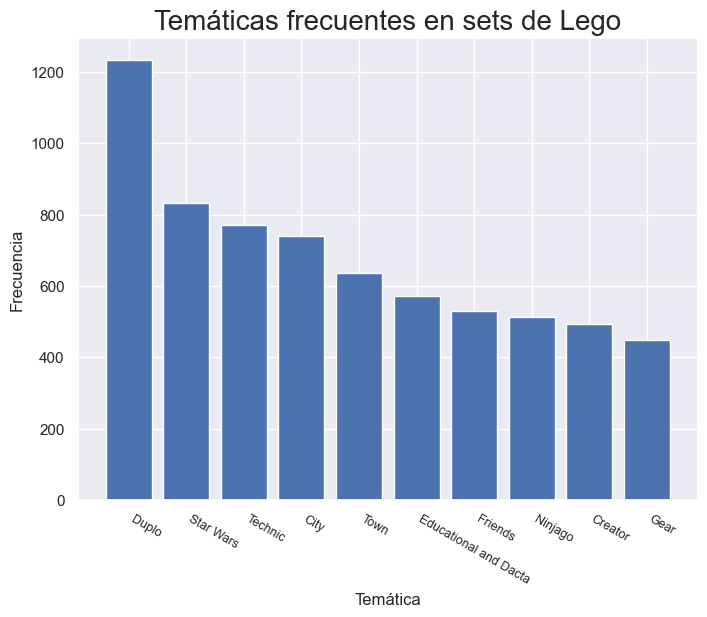

In [141]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [144]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

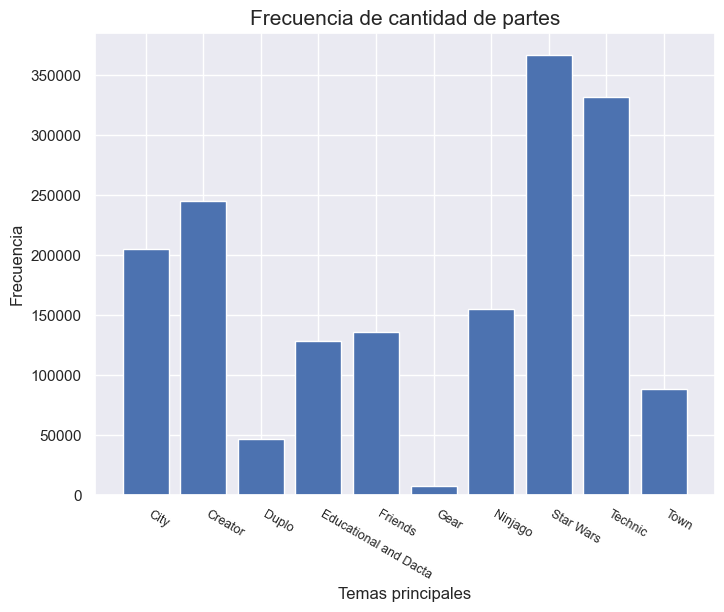

In [146]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [147]:
grouped_df = grouped_df[~grouped_df['themes_parent_name'].isin(['Gear'])]

In [148]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

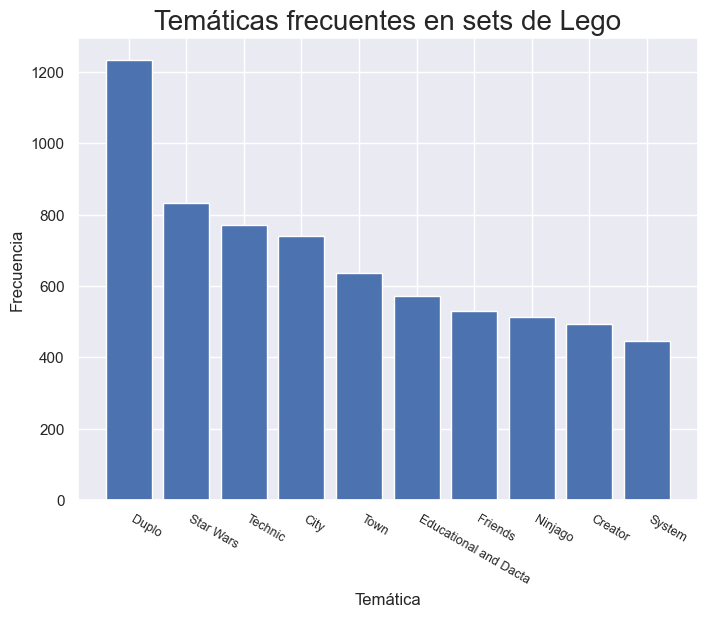

In [149]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [150]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

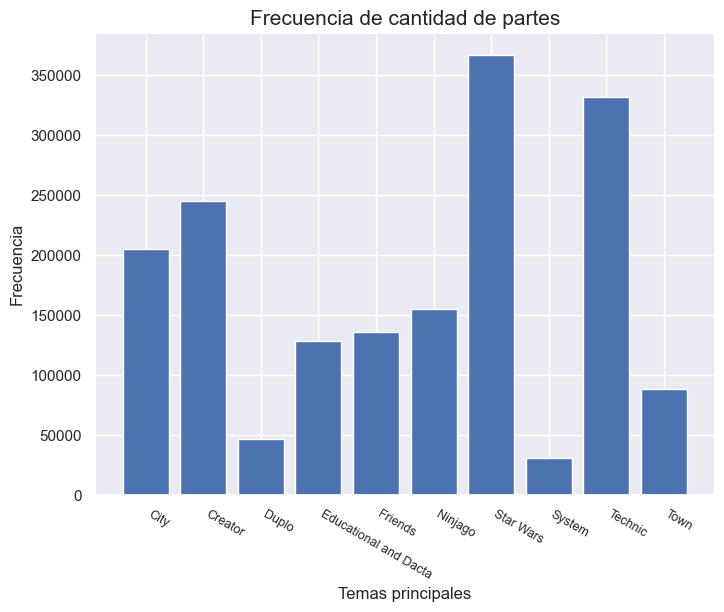

In [151]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [152]:
grouped_df = grouped_df[~grouped_df['themes_parent_name'].isin(['System'])]

In [153]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

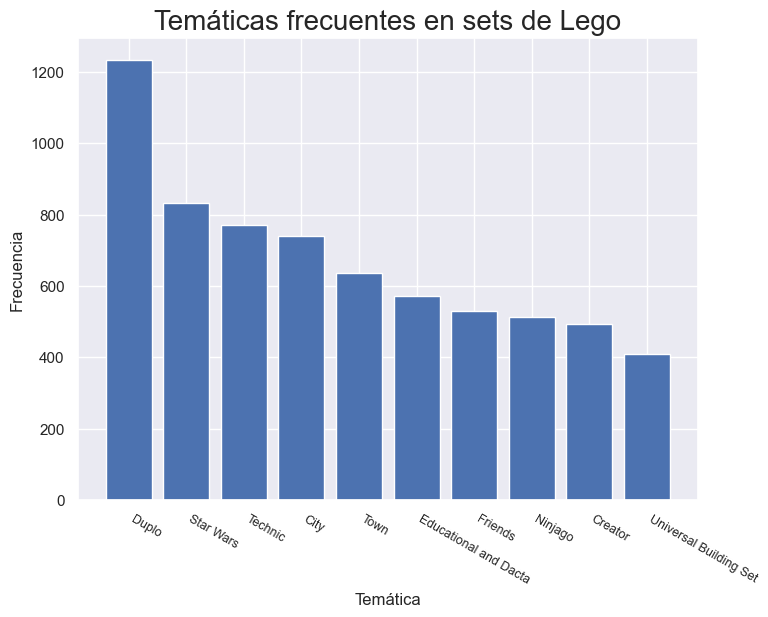

In [154]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [155]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

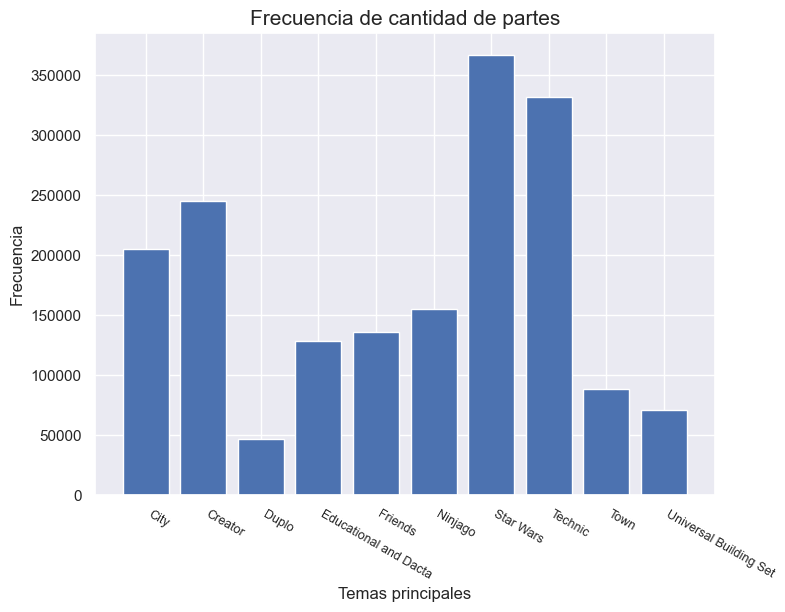

In [156]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [157]:
#Dejamos solo las variables que nos interesan y eliminamos el resto
df_final = df_final.drop(columns=['id','version','color_id', 'is_spare', 'name', 'part_cat_id'])
# Agregar un numeral a los rgb para graficarlos
df_final['rgb'] = df_final['rgb'].apply(lambda x : '#'+x)
df_final

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories
17,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories
18,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories
...,...,...,...,...,...,...,...
1083099,10997-1,Duplo,102287pr0001,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1083100,10997-1,Duplo,102287pr0002,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1083101,10997-1,Duplo,102287pr0003,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1083102,10997-1,Duplo,3437pr0175,1,#FCFCFC,Plastic,"Duplo, Quatro and Primo"


### Análisis exploratorio

A continuación se hace un análisis de las variables que componen el dataset **df_final**

### Tipos de variables 

In [158]:
# Obtener los nombres de las columnas categóricas
cat_cols = df_final.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

Variables categóricas en el dataset:
set_num
themes_parent_name
part_num
rgb
part_material
cat_name


Donde todas las variables descriptas anteriormente son del tipo nominal.

In [159]:
# Obtener los nombres de las columnas numéricas
num_cols = df_final.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)

Variables numéricas en el dataset:
quantity_part


En forma resumida, las variables encontradas en el dataset son:

**Categóricas**
* set_num
* themes_parent_name
* part_num
* rgb
* part_material
* cat_name

**Numéricas**
* quantity_part

In [160]:
# Separar las variables numéricas y categóricas
num_data = df_final.loc[:, ["quantity_part"]]
cat_data = df_final.drop(['quantity_part'], axis=1)

In [161]:
# Resumen de 5 números de var numerica
resumen = num_data.describe()
print(resumen)

       quantity_part
count  507547.000000
mean        3.489273
std         8.621911
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       724.000000


In [162]:
print(aggregated_df_qp)

       themes_parent_name  quantity_part
6               Star Wars         366419
7                 Technic         330910
1                 Creator         244315
0                    City         205132
5                 Ninjago         155038
4                 Friends         135667
3   Educational and Dacta         128536
8                    Town          88096
9  Universal Building Set          70423
2                   Duplo          46434


In [163]:
# Verificar si hay valores faltantes
missing_values_count = df_final.isnull().sum()
non_zero_missing_num = missing_values_count[missing_values_count != 0]

print("Variables con missing values:")
if non_zero_missing_num.empty:
    print("0")
else:
    for variable, count in non_zero_missing_num.items():
        print(f"{variable}: {count}")

Variables con missing values:
0


In [164]:
# Exploraración de las variables categóricas
for col in cat_data:
    print(f"Classes in {col}:")
    print(df_final[col].value_counts())
    print('\n')

Classes in set_num:
set_num
71741-1           2618
71799-1           1369
10265-1           1176
70620-1           1013
71705-1            998
                  ... 
tech007promo-1       1
fruit8-1             1
970634-1             1
9898-1               1
970606-1             1
Name: count, Length: 6732, dtype: int64


Classes in themes_parent_name:
themes_parent_name
Star Wars                 91588
City                      87073
Friends                   62671
Creator                   57321
Technic                   53875
Ninjago                   52083
Town                      38123
Educational and Dacta     26252
Duplo                     24181
Universal Building Set    14380
Name: count, dtype: int64


Classes in part_num:
part_num
6141           13637
3023            8893
54200           6859
3024            6489
3710            5970
               ...  
170872             1
31110pr0067        1
31110pr0065        1
31110pr0064        1
76371pr0216        1
Name: count, Lengt

### Análisis de temáticas y colores más comunes

In [165]:
print(f"Hay {df_final['part_material'].nunique()} materiales distintos en el dataset")

Hay 5 materiales distintos en el dataset


In [166]:
print(f"Hay {df_final['rgb'].nunique()} colores distintos en el dataset")

Hay 129 colores distintos en el dataset


In [167]:
# Vemos cuántas piezas de cada color hay en los datos
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,344169
58,#A0A5A9,231433
128,#FFFFFF,205141
34,#6C6E68,155213
84,#C91A09,155129
1,#0055BF,107729
108,#F2CD37,100447
102,#E4CD9E,55678
55,#9BA19D,53924
24,#582A12,42139


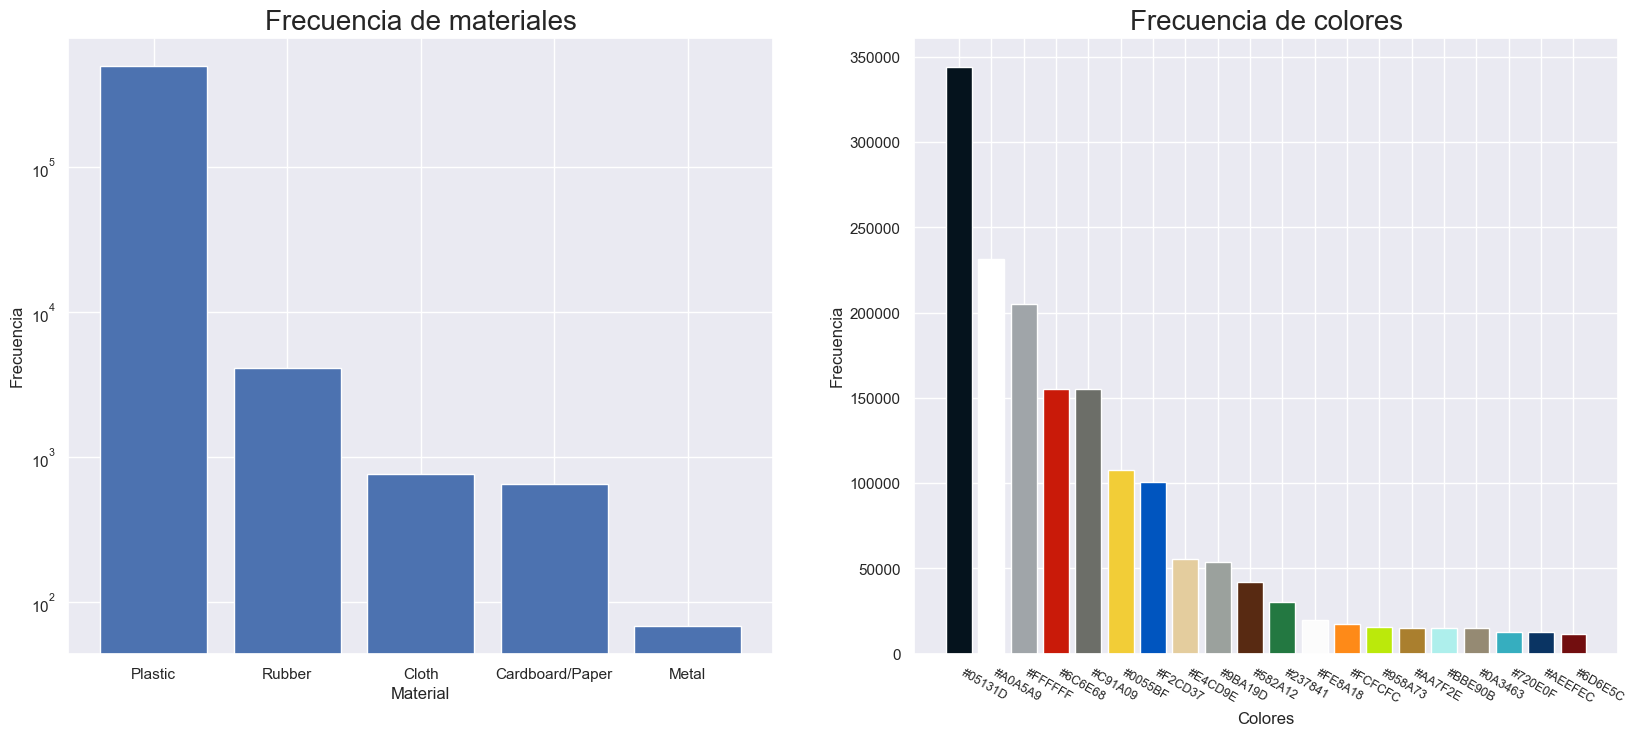

In [168]:
top_colores = 20
colores_grafico = df_final['rgb'].value_counts()[:top_colores].index

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].bar(df_final['part_material'].value_counts().index, df_final['part_material'].value_counts())
ax[0].set_xlabel('Material')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title("Frecuencia de materiales", fontsize = 20)
ax[0].set_yscale('log')

ax[1].bar(aggregated_df['rgb'][:top_colores], aggregated_df['quantity_part'][:top_colores], color=colores_grafico)
ax[1].set_xlabel('Colores')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title("Frecuencia de colores", fontsize = 20)

plt.setp(ax[1].get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

A continuación se analizan los colores en cada temática

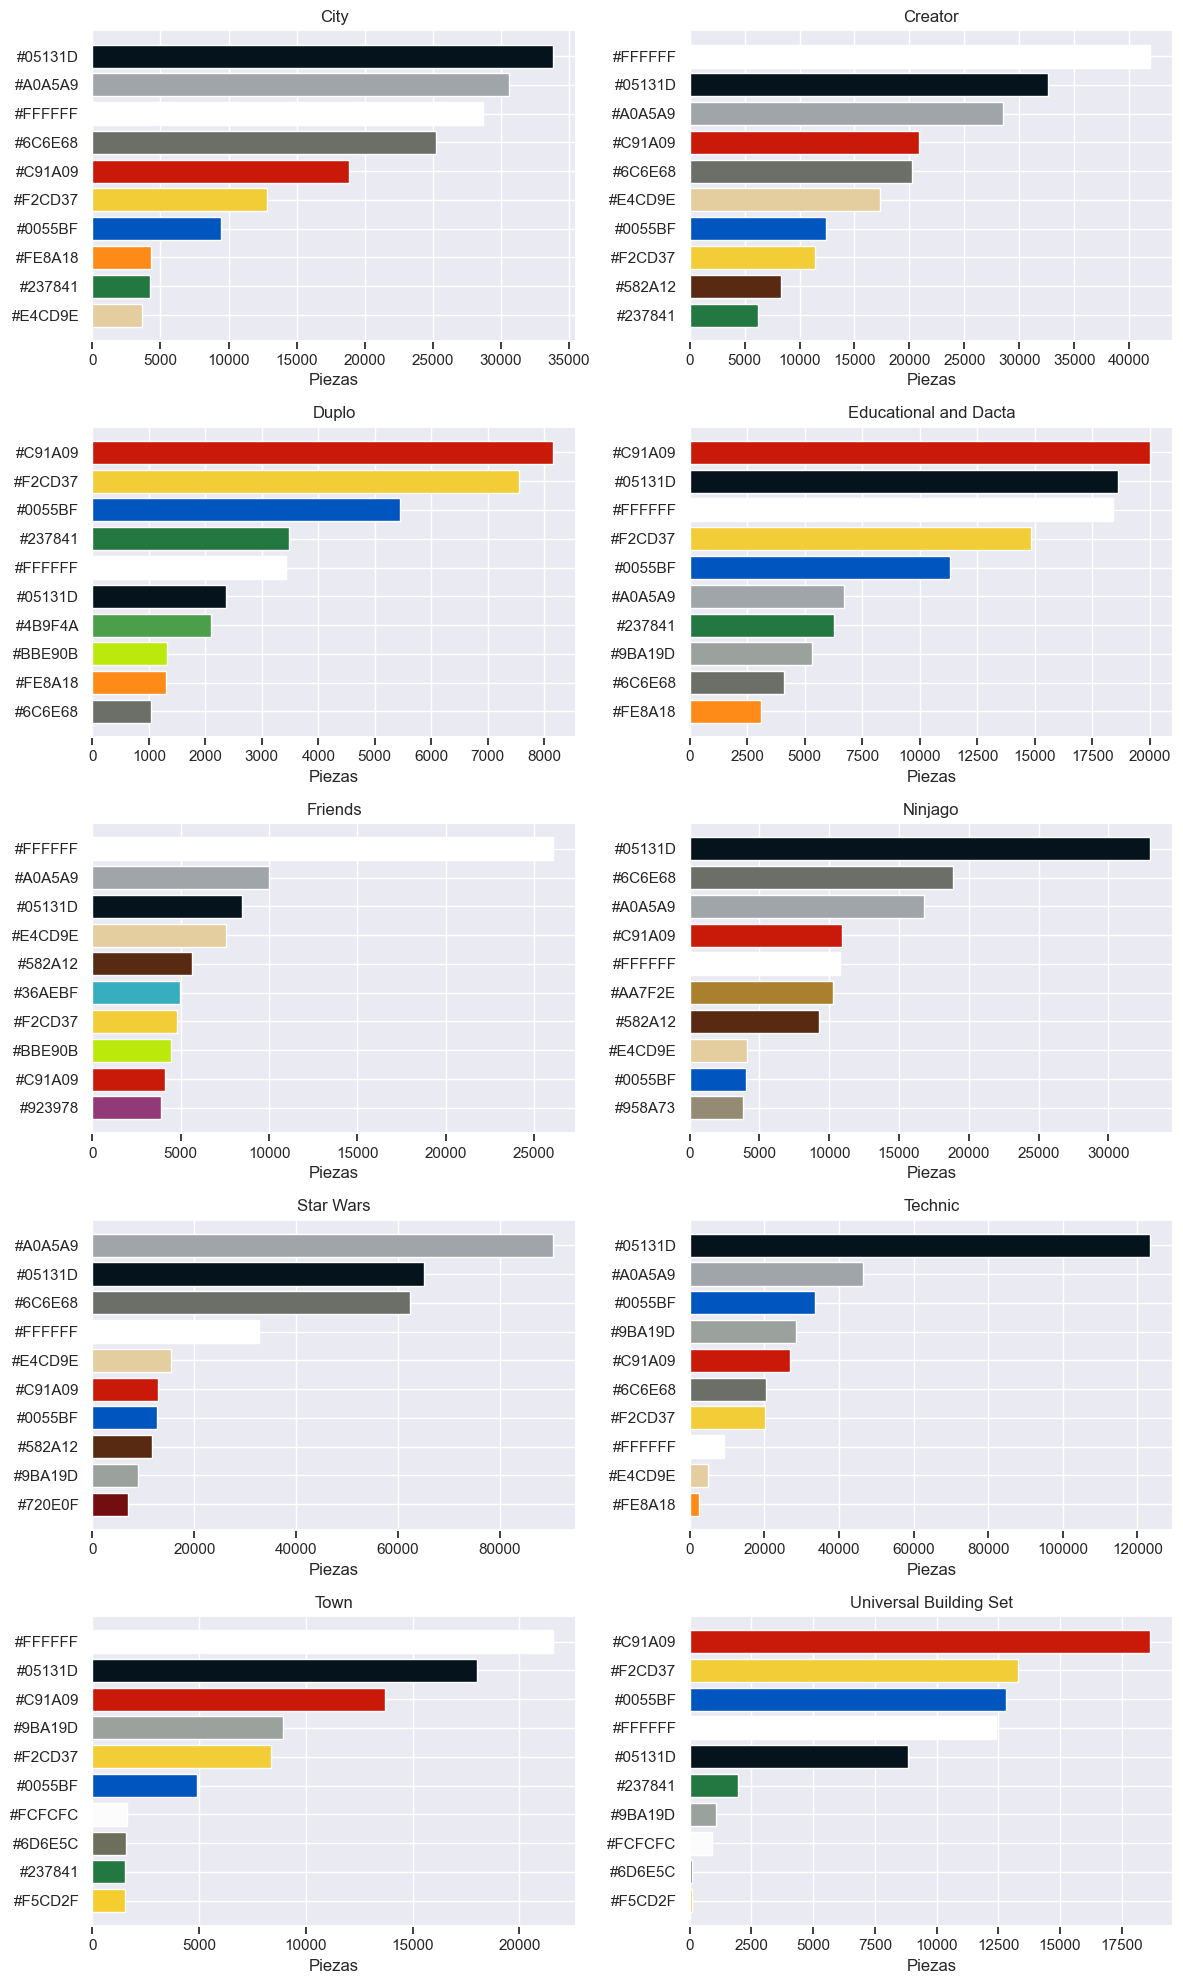

In [169]:
# Elegir cuántos colores visualizar
top_colors = 10

# Agrupar y sumar piezas de cada color dentro de cada tema y quedarse con los colores con más piezas 
theme_color_counts = df_final.groupby(['themes_parent_name', 'rgb'])['quantity_part'].sum().reset_index()
top_10_colors = theme_color_counts.groupby('themes_parent_name').apply(lambda x: x.nlargest(top_colors, 'quantity_part')).reset_index(drop=True)

# Extraer los nombres de las temáticas y RGB únicos
grouped_data = top_10_colors.groupby('themes_parent_name')
theme_names = list(grouped_data.groups.keys())

top_10_rgb_codes = {}
for theme_name, group in grouped_data:
    sorted_data = group.sort_values(by='quantity_part', ascending=False)
    top_10_data = sorted_data.head(10)
    top_10_rgb_codes[theme_name] = top_10_data['rgb'].tolist()

# Bar charts
num_charts = len(theme_names)
num_cols = 2
num_rows = (num_charts + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=False)

for i, theme_name in enumerate(theme_names):
    row = i // num_cols
    col = i % num_cols

    theme_rgb_codes = top_10_rgb_codes[theme_name]
    group = grouped_data.get_group(theme_name)
    frequencies = group.loc[group['rgb'].isin(theme_rgb_codes), 'quantity_part']
    colors = group.loc[group['rgb'].isin(theme_rgb_codes), 'rgb']

    y_pos = np.arange(len(frequencies))
    axs[row, col].barh(y_pos, frequencies, align='center', color=colors)
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(colors)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('Piezas')
    axs[row, col].set_title(theme_name)

    # Create a twin Axes object for separate x-axis scale
    axs_twin = axs[row, col].twiny()

    # Adjust x-axis limits
    max_frequency = max(frequencies)
    axs_twin.set_xlim([0, max_frequency * 1.1])  # Add a buffer of 10% to the maximum frequency for better visibility

    # Remove ticks and labels from the twin Axes
    axs_twin.set_xticks([])
    axs_twin.set_xticklabels([])

# Hide unused subplots
if num_charts < num_rows * num_cols:
    for i in range(num_charts, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()

### Análisis de categorías de piezas

In [170]:
print(f"Hay {df_final['cat_name'].nunique()} nombres de categorías de piezas distintas en el dataset")

Hay 63 nombres de categorías de piezas distintas en el dataset


In [171]:
subset_df = df_final[['quantity_part', 'cat_name']]
aggregated_df = subset_df.groupby('cat_name').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
print(aggregated_df)

               cat_name  quantity_part
32               Plates         255042
3                Bricks         208586
50         Technic Pins         144211
35       Plates Special         116984
6         Bricks Sloped          97013
..                  ...            ...
29                Other             21
18       Minidoll Heads             14
13             HO Scale              6
20  Minidoll Upper Body              6
19  Minidoll Lower Body              3

[63 rows x 2 columns]


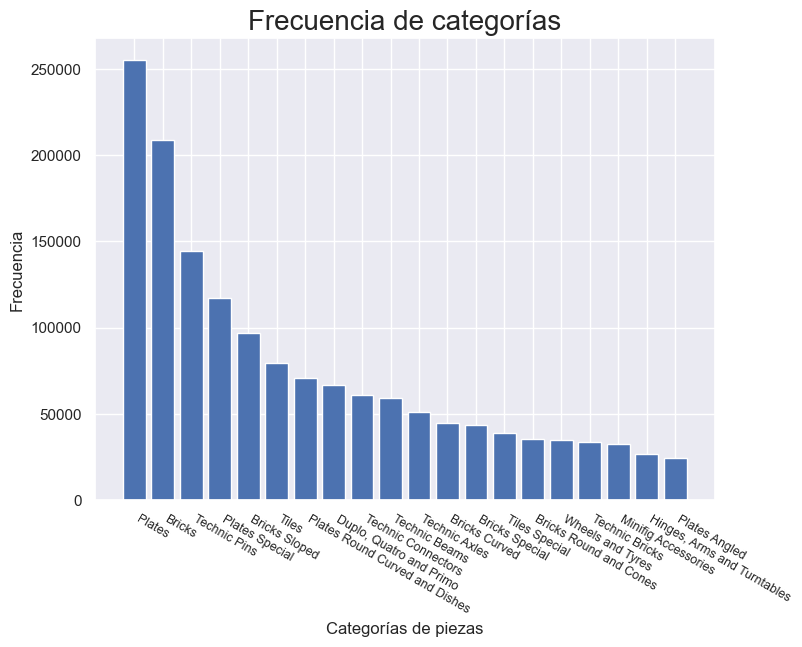

In [172]:
top_cat = 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(aggregated_df['cat_name'][:top_cat], aggregated_df['quantity_part'][:top_cat])
ax.set_xlabel('Categorías de piezas')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de categorías", fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

## Preparación de features

In [173]:
df_final_modelo = df_final.copy()

In [174]:
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,344169
58,#A0A5A9,231433
128,#FFFFFF,205141
34,#6C6E68,155213
84,#C91A09,155129
1,#0055BF,107729
108,#F2CD37,100447
102,#E4CD9E,55678
55,#9BA19D,53924
24,#582A12,42139


In [175]:
# Creo dummies para colores comunes
colores = {
    'negro': '#05131D',
    'gris': '#A0A5A9',
    'blanco': '#FFFFFF',
    'gris_2': '#6C6E68',
    'rojo': '#C91A09',
    'azul': '#0055BF',
    'amarillo': '#F2CD37',
    'gris_3': '#9BA19D',
    'beige': '#E4CD9E',
    'marron': '#582A12'
}

# Contar cuántas piezas hay en cada observación para cada uno de los colores más comunes
for variable_name, colores in colores.items():
    df_final_modelo[variable_name] = np.where(df_final_modelo['rgb'] == colores, 1, 0) * df_final_modelo['quantity_part']

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,gris_2,rojo,azul,amarillo,gris_3,beige,marron
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0
17,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,0,0,0,1,0,0,0
18,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,0,0,0,0,4,0,0
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0


In [176]:
# Contar cuántas piezas de cada material hay en cada observación
dummy_variables = pd.get_dummies(df_final_modelo['part_material'], dtype=int)
dummy_variables = dummy_variables.mul(df_final_modelo['quantity_part'], axis=0)
df_final_modelo = pd.concat([df_final_modelo, dummy_variables], axis=1)
df_final_modelo

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,...,azul,amarillo,gris_3,beige,marron,Cardboard/Paper,Cloth,Metal,Plastic,Rubber
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,2,0
17,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,...,0,1,0,0,0,0,0,0,1,0
18,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,...,0,0,4,0,0,0,0,0,4,0
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
# # Creo dummies para piezas transparentes
# transp = {
#     'transp': 't',
#     'no_transp': 'f',
# }

# # Contar cuántas piezas transparentes y no transparentes hay en cada observación
# for variable_name, colores in transp.items():
#     df_final_modelo[variable_name] = np.where(df_final_modelo['is_trans'] == colores, 1, 0) * df_final_modelo['quantity_part']

# df_final_modelo.head()

In [177]:
# Categorías de piezas más comunes
subset_df = df_final[['quantity_part', 'cat_name']]
aggregated_df = subset_df.groupby('cat_name').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,cat_name,quantity_part
32,Plates,255042
3,Bricks,208586
50,Technic Pins,144211
35,Plates Special,116984
6,Bricks Sloped,97013
53,Tiles,79599
34,Plates Round Curved and Dishes,70868
10,"Duplo, Quatro and Primo",66620
47,Technic Connectors,61031
43,Technic Beams,59166


In [178]:
# Contar cuántas piezas de cada categoría hay en cada observación
dummy_variables = pd.get_dummies(df_final_modelo['cat_name'], dtype=int)
dummy_variables = dummy_variables.mul(df_final_modelo['quantity_part'], axis=0)
df_final_modelo = pd.concat([df_final_modelo, dummy_variables], axis=1)
df_final_modelo

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Limpio el dataset de variables que no sirve agrupar
columns_to_drop = ['part_num', 'rgb','part_material','cat_name']
df_final_modelo = df_final_modelo.drop(columns=columns_to_drop)

In [180]:
# Agrupo el dataset por set_num
aggregation_dict = {'themes_parent_name': 'first'}
for column in df_final_modelo.columns:
    if column != 'themes_parent_name' and column != 'set_num':
        aggregation_dict[column] = 'sum'

df_final_modelo = df_final_modelo.groupby('set_num').agg(aggregation_dict).reset_index()
df_final_modelo

,set_num,themes_parent_name,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,001-1,Technic,43,0,0,17,0,13,1,4,...,0,0,0,0,0,0,0,22,0,0
1,002-1,Technic,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,010-2,Duplo,18,0,0,2,0,7,5,4,...,0,0,0,0,0,0,0,0,0,0
3,028-1,Duplo,7,0,0,2,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,030-2,Duplo,29,0,0,1,0,11,9,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,fruit8-1,Creator,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6728,sw117promo-1,Star Wars,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6729,tech007promo-1,Technic,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730,tf05-1,Star Wars,35,5,14,0,7,0,0,0,...,0,1,6,0,0,0,0,0,0,0


In [181]:
# Calcular proporciones de colores, materiales y categorias en cada set
columns_to_divide = df_final_modelo.columns.drop(['set_num', 'themes_parent_name', 'quantity_part'])
df_final_modelo[columns_to_divide] = df_final_modelo[columns_to_divide].div(df_final_modelo['quantity_part'], axis=0)

In [182]:
df_final_modelo

,set_num,themes_parent_name,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,001-1,Technic,43,0.000000,0.000000,0.395349,0.000000,0.302326,0.023256,0.093023,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.511628,0.0,0.0
1,002-1,Technic,3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,010-2,Duplo,18,0.000000,0.000000,0.111111,0.000000,0.388889,0.277778,0.222222,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,028-1,Duplo,7,0.000000,0.000000,0.285714,0.000000,0.142857,0.285714,0.142857,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,030-2,Duplo,29,0.000000,0.000000,0.034483,0.000000,0.379310,0.310345,0.275862,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,fruit8-1,Creator,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6728,sw117promo-1,Star Wars,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6729,tech007promo-1,Technic,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6730,tf05-1,Star Wars,35,0.142857,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.028571,0.171429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## Selección de features

In [183]:
# Defino target y features
X = df_final_modelo.drop(['themes_parent_name', 'set_num'], axis=1)
y = df_final_modelo['themes_parent_name']

In [193]:
# Random Forest
model = RandomForestClassifier()
model.fit(X, y_encoded)
# Obtengo la importancia de las características
feature_importances = model.feature_importances_
# Combino las variables indep y sus importancias en un df
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Ordeno el df por importancia descendente
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
# Selecciono las 10 variables más importantes
top_10_features = feature_importances_df.head(10)['Feature'].tolist()

In [194]:
top_10_features

['Duplo, Quatro and Primo',
 'quantity_part',
 'Minifig Accessories',
 'gris',
 'Transportation - Land',
 'Plates',
 'gris_2',
 'Bricks',
 'rojo',
 'negro']

In [195]:
from sklearn.feature_selection import SelectKBest, f_classif

# Creo selector de características basado en ANOVA
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y_encoded)
feature_scores = selector.scores_
# Combino las variables indep y sus puntuaciones en un df
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
# Ordeno el df por puntuación descendente
feature_scores_df = feature_scores_df.sort_values('Score', ascending=False)
# Selecciono las 10 características con las puntuaciones más altas
top_10_features = feature_scores_df.head(10)['Feature'].tolist()

In [196]:
top_10_features

['Duplo, Quatro and Primo',
 'Bricks',
 'Plates',
 'Plates Special',
 'Technic Pins',
 'Plates Round Curved and Dishes',
 'gris',
 'Bricks Curved',
 'Technic Connectors',
 'Tiles']

### Transformación de varaibles categóricas

In [188]:
# Perform label encoding across target features

# Instance Label Encoder
le = LabelEncoder()

y_encoded =  le.fit_transform(y)

In [200]:
y_encoded = pd.DataFrame(y_encoded)
df_encoded = pd.concat([X, y_encoded], axis=1)
df_encoded

,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,gris_3,beige,...,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage,0
0,43,0.000000,0.000000,0.395349,0.000000,0.302326,0.023256,0.093023,0.186047,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.511628,0.0,0.0,7
1,3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,7
2,18,0.000000,0.000000,0.111111,0.000000,0.388889,0.277778,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
3,7,0.000000,0.000000,0.285714,0.000000,0.142857,0.285714,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
4,29,0.000000,0.000000,0.034483,0.000000,0.379310,0.310345,0.275862,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
6728,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6
6729,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,7
6730,35,0.142857,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.114286,...,0.028571,0.171429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6


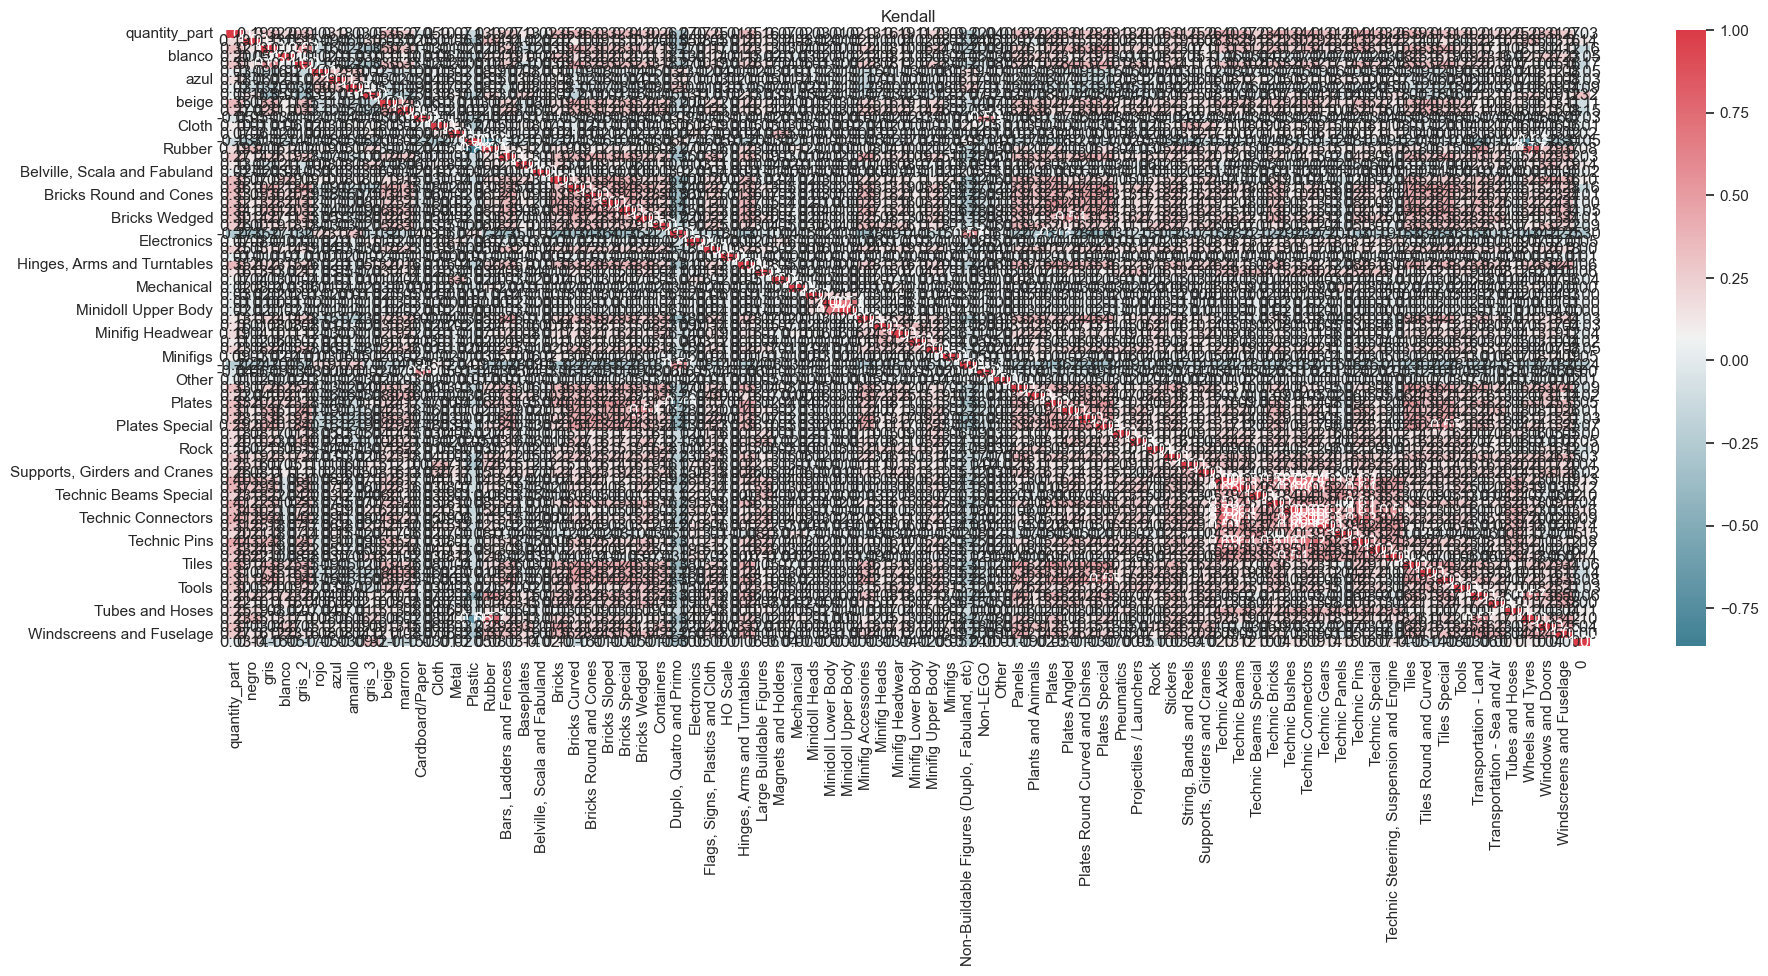

In [201]:
fig, axes = plt.subplots(1,1,figsize=(22,8))

tau = df_encoded.corr(method='kendall')
axes.set_title("Kendall")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)